In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [15]:
rf_validation = pd.read_csv('./datasets/rf_results.csv')
lasso_validation = pd.read_csv('./datasets/lasso_results.csv')
arima_validation = pd.read_csv('./datasets/arima_results.csv')
xgboost_validation = pd.read_csv('./datasets/xg_results.csv')

In [16]:
rf_validation = rf_validation.drop(columns=['Unnamed: 0'])
lasson_validation = lasso_validation.drop(columns=['Unnamed: 0'])
arima_validation = arima_validation.drop(columns=['Unnamed: 0'])
xgboost_validation = xgboost_validation.drop(columns=['Unnamed: 0'])

In [17]:
min_len = np.min([len(rf_validation), len(lasson_validation), len(arima_validation), len(xgboost_validation)])

if len(rf_validation) > min_len:
    rf_validation = rf_validation.iloc[len(rf_validation)-min_len:]

if len(lasso_validation) > min_len:
    lasso_validation = lasso_validation.iloc[len(lasso_validation)-min_len:]

if len(arima_validation) > min_len:
    arima_validation = arima_validation.iloc[len(arima_validation)-min_len:]

if len(xgboost_validation) > min_len:
    xgboost_validation = xgboost_validation.iloc[len(xgboost_validation)-min_len:]

real_y = np.array(lasso_validation['real_y'])


In [18]:
y_lasso = np.array(lasso_validation['lasso_y'])
y_rf = np.array(rf_validation['rf_y'])
y_arima = np.array(arima_validation['arima_y'])
y_xboost = np.array(xgboost_validation['xg_y'])

In [19]:
avg_y = []
for i in range(0,len(y_rf)):
    avg_y.append((y_lasso[i]+y_rf[i]+y_xboost[i])/3)

avg_y = np.array(avg_y)
avg_y

array([0.21912901, 0.19854755, 0.1991717 , 0.20720008, 0.19732313,
       0.18996957, 0.19251741, 0.20347353, 0.19383667, 0.20124477,
       0.20032409, 0.20453143, 0.21770397, 0.20754996, 0.2351799 ,
       0.25786058, 0.2454993 , 0.23668846, 0.23873764, 0.22683726,
       0.23326862, 0.22664764, 0.21136817, 0.2073543 , 0.19863069,
       0.21864832, 0.2176934 , 0.21898187, 0.2034311 , 0.19964111,
       0.18278913, 0.19206766, 0.19510871, 0.19584634, 0.20852096,
       0.19157693, 0.20755978, 0.22441364, 0.2261694 , 0.24636251,
       0.24641448, 0.26438646, 0.21522032, 0.24355561, 0.22072848,
       0.22385516, 0.23694465, 0.21840328, 0.21457909, 0.19792652,
       0.19714229, 0.20965663, 0.20606115, 0.20832941, 0.18661615,
       0.20380658, 0.18904173, 0.1870011 , 0.19578929, 0.19717514,
       0.25378938, 0.30038595, 0.25572389, 0.27960664, 0.26868767,
       0.29539968, 0.27743377, 0.27233067, 0.21766718, 0.23563229,
       0.24871085, 0.2467066 , 0.21554778, 0.21043251, 0.23698

In [20]:
print('mean_absolute_error: ', mean_absolute_error(real_y, avg_y))

mean_absolute_error:  0.03057343813725863


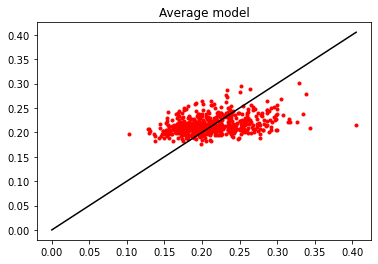

In [21]:
line=np.linspace(0,np.max(real_y),len(real_y)) 

plt.plot(real_y,avg_y,'r.') 
plt.plot(line,line,'k-') 

plt.title('Average model')


plt.show()

In [22]:
y_val_array = np.array(real_y)
biggest_error=0
for i in range(0,len(y_val_array)):
    if biggest_error < abs(avg_y[i] - y_val_array[i]):
        biggest_error= abs(avg_y[i] - y_val_array[i])

biggest_error

0.18991725903751286

In [23]:
y_val_array = np.array(real_y)
lower_values=0
for i in range(0,len(y_val_array)):
    if avg_y[i] <= y_val_array[i]:
        lower_values=lower_values+1

print("Amount of predicted min tip that wouldn't be enough to go through:" , lower_values)
print("Percetage of predicted min tip that wouldn't be enough to go through: ", (lower_values/len(y_val_array)*100), "%")

Amount of predicted min tip that wouldn't be enough to go through: 246
Percetage of predicted min tip that wouldn't be enough to go through:  42.2680412371134 %


In [24]:
errors_validation = []
for i in range(0,len(y_val_array)):
    if abs(avg_y[i] - y_val_array[i]) <= 100:
        errors_validation.append(avg_y[i] - y_val_array[i])

erros_validation = np.array(errors_validation)

Text(0, 0.5, '# blocks')

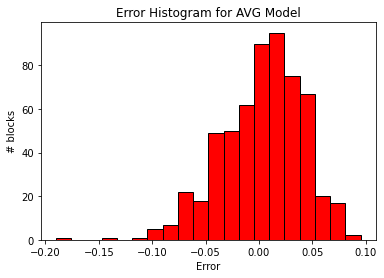

In [28]:
plt.hist(errors_validation, bins = 20, color = 'red', edgecolor = 'black')
plt.title('Error Histogram for AVG Model')
plt.xlabel('Error')
plt.ylabel('# blocks')